# Cleaning and Analyzing Employee Exit Surveys

In this project, our goal is to clean and analyze employee exit surveys to answer the following questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will be working with exit surveys from employees of the Department of Education, Training, and Employment (DETE) and the Technical and Further Education institute in Queensland, Australia (TAFE).

## Setting up our environment

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Initial exploration

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

We can make the following observations:
- The dete_survey dataframe has values that are 'Not Stated' which should be represented as NaN
- Both surveys contain many columns we won't need for our analsyis
- Both surveys represent the same columns with different names
- There are multiple columns that indicate an employee resigned because they were dissatisfied

## Identifying missing values and dropping unnecessary columns

In [7]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [8]:
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [9]:
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Reading the dete_survey into a dataframe with the na_values parameter set to 'Not Stated' solved our problem of missing values which weren't represented as NaN. Dropping columns will simplify our analysis as we don't need these columns to answer our questions.

## Cleaning column names

In [10]:
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(' ', '_')

In [11]:
tafe_survey = tafe_survey.rename(columns={'Record ID': 'id',
                            'CESSATION YEAR': 'cease_date',
                           'Reason for ceasing employment': 'separationtype',
                           'Gender. What is your Gender?': 'gender',
                           'CurrentAge. Current Age': 'age',
                           'Employment Type. Employment Type': 'employment_status',
                           'Classification. Classification': 'position',
                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})
                   

Standardizing the column names in both dataframes allows for consitency so we can combine the dataframes in our analysis.

## Filtering the data

In [12]:
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
dete_resignations = dete_survey[dete_survey['separationtype'].str.contains('Resignation')].copy()

In [15]:
tafe_resignations = tafe_survey[tafe_survey['separationtype'] == 'Resignation'].copy()

Our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Filtering our data to only include resignations removed any data that we don't need for our analysis

## Verifying the data

Before we start our analysis it is important to verify that our data doesn't contain any major inconsitencies. Garbage in = garbage out.

### Checking the years in each dataframe for logical inconsitencies

In [16]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [17]:
dete_resignations['cease_year'] = dete_resignations['cease_date'].str.extract(r"([1-2][0-9][0-9][0-9])", expand=False).astype(float)

In [18]:
dete_resignations['cease_year'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_year, dtype: int64

In [19]:
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype(float)

In [20]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [21]:
tafe_resignations['cease_date']

3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
8      2009.0
9      2010.0
10     2010.0
13     2010.0
14     2010.0
15     2010.0
16     2010.0
17     2010.0
18     2010.0
19     2010.0
20     2010.0
21     2010.0
22     2010.0
23     2010.0
24     2010.0
26     2010.0
27     2010.0
29     2010.0
32     2010.0
36     2010.0
37     2010.0
39     2010.0
40     2010.0
41     2010.0
42     2010.0
        ...  
659    2013.0
660    2013.0
661    2013.0
665    2013.0
666    2013.0
669    2013.0
670    2013.0
671    2013.0
675    2013.0
676    2013.0
677    2013.0
678    2013.0
679    2013.0
681    2013.0
682    2013.0
683    2013.0
684    2013.0
685    2013.0
686    2013.0
688    2013.0
689    2013.0
690    2013.0
691    2013.0
693    2013.0
694    2013.0
696    2013.0
697    2013.0
698    2013.0
699    2013.0
701    2013.0
Name: cease_date, Length: 340, dtype: float64

We can verify that there aren't any major issues with the years. We can also observe that the years in each datafram don't quite span the same number of years, we can drop years we don't need for our analysis later.

## Creating a new column

We already have the employee service records for our tafe_resignations dataframe. In order to analyze both surveys together, we need to create a service column in dete_resignations.

In [22]:
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']

## Identifying dissatisfied employees

If an employee resigned due to job dissatisfaction they will be marked as True in a new column.

In [23]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [24]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [25]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [26]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)

In [27]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

## Combining the data

In [28]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [29]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [30]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()

In [31]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,05/2012,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
5,41-45,05/2012,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,07/2012,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
9,46-50,2012,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
11,31-35,2012,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


When combining the datasets we added an institute column in order to distinguish between the two surveys. We also dropped columns which aren't needed for our analysis.

## Cleaning the service column

To analyze our data, we will convert the service column numbers into categories following the definitions below:
    
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [32]:
combined_updated['institute_service'] = (combined_updated['institute_service']
                                         .astype(str)
                                         .str.extract(r'(\d+)', expand=False)
                                         .astype(float))
combined_updated['institute_service'].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [33]:
def map_year_value(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    elif val > 11:
        return 'Veteran'

In [34]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_year_value)

In [35]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
3,36-40,05/2012,False,Permanent Full-time,Female,4.0,DETE,7.0,Teacher,Resignation-Other reasons,Established
5,41-45,05/2012,True,Permanent Full-time,Female,6.0,DETE,18.0,Guidance Officer,Resignation-Other reasons,Veteran
8,31-35,07/2012,False,Permanent Full-time,Female,9.0,DETE,3.0,Teacher,Resignation-Other reasons,Experienced
9,46-50,2012,True,Permanent Part-time,Female,10.0,DETE,15.0,Teacher Aide,Resignation-Other employer,Veteran
11,31-35,2012,False,Permanent Full-time,Male,12.0,DETE,3.0,Teacher,Resignation-Move overseas/interstate,Experienced


We created the service_cat column, which categorized employees according to the amount of years spent in their workplace. 

## Analysis - Q1

In [36]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [37]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [38]:
service_pvt = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

In [39]:
%matplotlib inline

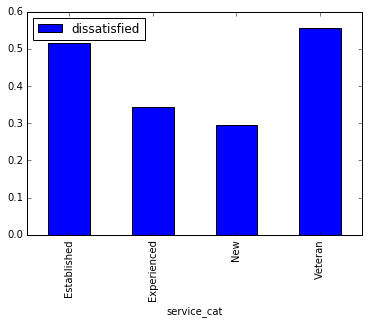

In [40]:
service_pvt.plot(kind='bar')

Based on the analysis, we can determine that established and veteran employees are more likely to resign due to job dissatisfaction reasons.

## Cleaning the age column

In [41]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [42]:
combined_updated['age'] = combined_updated['age'].astype(str).str.extract(r'(\d+)', expand=False).astype(float)

In [43]:
combined_updated['age'].value_counts(dropna=False)

 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: age, dtype: int64

## Analysis - Q2

In [44]:
age_pvt = combined_updated.pivot_table(index='age', values='dissatisfied')

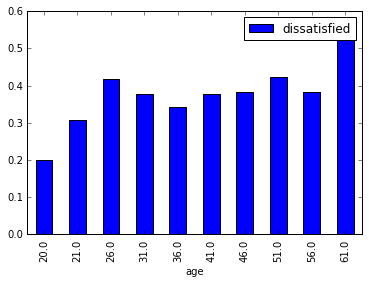

In [45]:
age_pvt.plot(kind='bar')

We can conclude that there is no obvious correlation between age and job dissatisfaction. The only notable difference in the categories occurs with employees less than 25, who tend to be less dissatisfied; and with employees greater than 60, who tend to be the most dissatisfied.